<a href="https://colab.research.google.com/github/MildredJmz1/Applied-Computing/blob/main/Q3_Exam_AppComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mildred Jiménez (A01631207)

## **QUESTION 3**

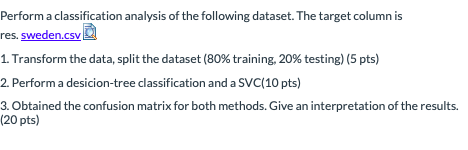

The required libraries were loaded and the dataset was imported.

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df=pd.read_csv('/content/drive/MyDrive/sweden.csv')
df=pd.DataFrame(df)
display(df)

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Sweden,Allsvenskan,2012,31/03/2012,15:00,Elfsborg,Djurgarden,2,1,H,1.71,3.98,5.44,1.73,3.98,5.50,1.66,3.68,5.00
1,Sweden,Allsvenskan,2012,31/03/2012,15:00,GAIS,Hacken,0,0,D,2.21,3.57,3.48,2.50,3.57,3.50,2.25,3.24,3.11
2,Sweden,Allsvenskan,2012,31/03/2012,15:00,Sundsvall,Kalmar,0,1,A,2.72,2.39,2.80,2.75,3.31,2.82,2.64,3.14,2.62
3,Sweden,Allsvenskan,2012,01/04/2012,13:00,AIK,Mjallby,0,0,D,1.75,3.63,5.73,1.75,3.63,5.75,1.71,3.43,4.99
4,Sweden,Allsvenskan,2012,01/04/2012,16:30,Syrianska,Goteborg,2,1,H,5.01,3.49,1.87,5.01,3.65,1.89,4.63,3.41,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Sweden,Allsvenskan,2019,02/11/2019,12:00,Norrkoping,Djurgarden,2,2,D,3.32,3.06,2.46,3.35,3.30,2.50,3.17,3.07,2.39
1932,Sweden,Allsvenskan,2019,02/11/2019,12:00,Orebro,Malmo FF,0,5,A,15.84,7.53,1.17,17.00,7.60,1.21,13.83,6.96,1.18
1933,Sweden,Allsvenskan,2019,02/11/2019,12:00,Sirius,Kalmar,3,0,H,5.16,4.11,1.66,5.50,4.11,1.77,4.98,3.83,1.66
1934,Sweden,Allsvenskan,2019,06/11/2019,18:00,Brage,Kalmar,0,2,A,3.07,3.25,2.49,3.23,3.38,2.55,2.97,3.13,2.43


Analysing the sample data prior to building the model is important to understand its behaviour. In this case, the dataset was first explored to find out if there were any missing values and to understand the different types of variables that it contains. 

In [44]:
print(df.isnull().sum()) #6 values are missing in the dataset

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         2
PD         2
PA         2
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64


In [45]:
df.dtypes #the dataset contains three different types of variables.

Country     object
League      object
Season       int64
Date        object
Time        object
Home        object
Away        object
HG           int64
AG           int64
Res         object
PH         float64
PD         float64
PA         float64
MaxH       float64
MaxD       float64
MaxA       float64
AvgH       float64
AvgD       float64
AvgA       float64
dtype: object

Since the number of missing values was low, these were dropped from the dataset. 

In [46]:
df = df.dropna()
print(df)

     Country       League  Season        Date  ...  MaxA   AvgH  AvgD  AvgA
0     Sweden  Allsvenskan    2012  31/03/2012  ...  5.50   1.66  3.68  5.00
1     Sweden  Allsvenskan    2012  31/03/2012  ...  3.50   2.25  3.24  3.11
2     Sweden  Allsvenskan    2012  31/03/2012  ...  2.82   2.64  3.14  2.62
3     Sweden  Allsvenskan    2012  01/04/2012  ...  5.75   1.71  3.43  4.99
4     Sweden  Allsvenskan    2012  01/04/2012  ...  1.89   4.63  3.41  1.77
...      ...          ...     ...         ...  ...   ...    ...   ...   ...
1931  Sweden  Allsvenskan    2019  02/11/2019  ...  2.50   3.17  3.07  2.39
1932  Sweden  Allsvenskan    2019  02/11/2019  ...  1.21  13.83  6.96  1.18
1933  Sweden  Allsvenskan    2019  02/11/2019  ...  1.77   4.98  3.83  1.66
1934  Sweden  Allsvenskan    2019  06/11/2019  ...  2.55   2.97  3.13  2.43
1935  Sweden  Allsvenskan    2019  10/11/2019  ...  5.80   1.72  3.49  5.14

[1934 rows x 19 columns]


A new dataset, whithout the null values, was established:

In [47]:
df2=df.copy()
df2

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Sweden,Allsvenskan,2012,31/03/2012,15:00,Elfsborg,Djurgarden,2,1,H,1.71,3.98,5.44,1.73,3.98,5.50,1.66,3.68,5.00
1,Sweden,Allsvenskan,2012,31/03/2012,15:00,GAIS,Hacken,0,0,D,2.21,3.57,3.48,2.50,3.57,3.50,2.25,3.24,3.11
2,Sweden,Allsvenskan,2012,31/03/2012,15:00,Sundsvall,Kalmar,0,1,A,2.72,2.39,2.80,2.75,3.31,2.82,2.64,3.14,2.62
3,Sweden,Allsvenskan,2012,01/04/2012,13:00,AIK,Mjallby,0,0,D,1.75,3.63,5.73,1.75,3.63,5.75,1.71,3.43,4.99
4,Sweden,Allsvenskan,2012,01/04/2012,16:30,Syrianska,Goteborg,2,1,H,5.01,3.49,1.87,5.01,3.65,1.89,4.63,3.41,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Sweden,Allsvenskan,2019,02/11/2019,12:00,Norrkoping,Djurgarden,2,2,D,3.32,3.06,2.46,3.35,3.30,2.50,3.17,3.07,2.39
1932,Sweden,Allsvenskan,2019,02/11/2019,12:00,Orebro,Malmo FF,0,5,A,15.84,7.53,1.17,17.00,7.60,1.21,13.83,6.96,1.18
1933,Sweden,Allsvenskan,2019,02/11/2019,12:00,Sirius,Kalmar,3,0,H,5.16,4.11,1.66,5.50,4.11,1.77,4.98,3.83,1.66
1934,Sweden,Allsvenskan,2019,06/11/2019,18:00,Brage,Kalmar,0,2,A,3.07,3.25,2.49,3.23,3.38,2.55,2.97,3.13,2.43


A correlation analysis of the variables was carried out in order to determine which variables were significant to the model. As it can be observed from the correlation matrix and the correlation heatmap below, "Season" is the only variable that is not significantlty correlated with the rest of the variables. Therefore, it does not need to be used to buid any of the prediction models. 

In [48]:
df2.corr()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
Season,1.000000,-0.016584,0.009818,0.081307,0.025259,-0.014422,0.079029,0.064262,-0.006392,0.092258,0.112065,0.002885
HG,-0.016584,1.000000,-0.084761,-0.270941,0.258165,0.317923,-0.268822,0.253380,0.319026,-0.275335,0.255213,0.328503
AG,0.009818,-0.084761,1.000000,0.326737,-0.111295,-0.270017,0.322485,-0.111061,-0.263670,0.327117,-0.115526,-0.277782
PH,0.081307,-0.270941,0.326737,1.000000,-0.169793,-0.609675,0.994239,-0.163615,-0.595270,0.996008,-0.158595,-0.628253
PD,0.025259,0.258165,-0.111295,-0.169793,1.000000,0.824095,-0.149051,0.987927,0.839735,-0.173752,0.985879,0.823955
PA,-0.014422,0.317923,-0.270017,-0.609675,0.824095,1.000000,-0.595019,0.830472,0.991944,-0.616128,0.829454,0.993161
MaxH,0.079029,-0.268822,0.322485,0.994239,-0.149051,-0.595019,1.000000,-0.141726,-0.581662,0.996820,-0.138239,-0.614502
MaxD,0.064262,0.253380,-0.111061,-0.163615,0.987927,0.830472,-0.141726,1.000000,0.848143,-0.167547,0.991832,0.830698
MaxA,-0.006392,0.319026,-0.263670,-0.595270,0.839735,0.991944,-0.581662,0.848143,1.000000,-0.602837,0.847192,0.994883
AvgH,0.092258,-0.275335,0.327117,0.996008,-0.173752,-0.616128,0.996820,-0.167547,-0.602837,1.000000,-0.162912,-0.635887


The heat map of the correlation analysis below was developed for data visualization purposes; lighter colors represent a higher positive correlation between the corresponding variables (e.g. AvgH with PH and other parameters of the host team), while darker colors below zero indicate an inverse correlation, meaning that when the value of one of this variables is high, the value of the other one is low. This can mainly be observed when analysing the relationship between different parameters of the Away team VS the Home team; for example, PA vs PH. 

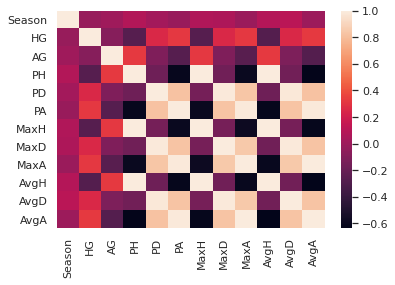

In [49]:
corr = df2.corr()
_ = sns.heatmap(corr)    #Correlation heatmap

It was determined that it was not necessary to generate any new metrics since the dataset already counts with different variables that contain a wide range of information about the matches (PH, PD, PA, MaxH, MaxD, MaxA, AvgA, AvgD and AvgH). 

The required libraries to apply the decision tree and SVC models were then loaded. 

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix 

The first step was to set the features of the model and its target column. As mentioned earlier, the feautures include different variables that describe the characteristics of the matches in different ways . The variables of Home Goals (HG) and Away Goals (AG) were not included since this would over feed information to the model and its accuracy would not be real. The data was also split into a training set (80%) and a test set (20%). Afterwards, a standarization process was carried out so that the type of variables were consistent. 

In [51]:
X=df2[['PH','PD','PA','MaxH','MaxD', 'MaxA','AvgH','AvgD','AvgA']]  # Features
y=df2['Res']  # target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree 

A Decision Tree Classification model was built with the previous split data and its accuracy was measured. 

In [54]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3) #this parameter was set=3 in order to avoid overfitting
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

The accuracy of the model was found out be 0.48. 

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4806201550387597


A confusion matrix  and a classification report were then obtain to better understand the accuracy of the model. The matrix was also plotted for data visualization purposes. 

In [57]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 48  37  31]
 [ 32  18  54]
 [ 26  21 120]]


              precision    recall  f1-score   support

           A       0.45      0.41      0.43       116
           D       0.24      0.17      0.20       104
           H       0.59      0.72      0.65       167

    accuracy                           0.48       387
   macro avg       0.43      0.44      0.43       387
weighted avg       0.45      0.48      0.46       387



In [58]:
from sklearn.metrics import plot_confusion_matrix

In [59]:
! pip install -q scikit-plot

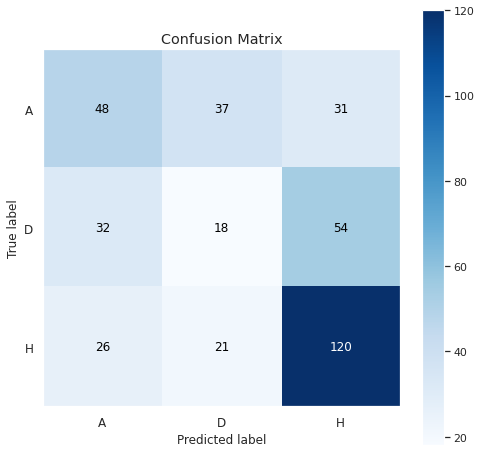

In [60]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))

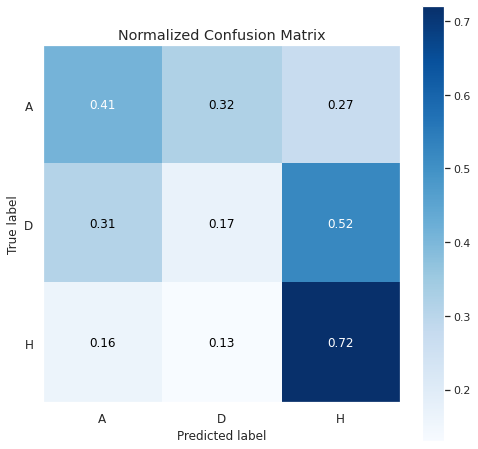

In [61]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    normalize=True,
    figsize=(8,8))

A confusion matrix allows us to better understand the accuracy of the model's performance by showing us more clearly how many of the predicions of each label were correct. The rows of the confusion matrices above represent the actual correct results (A, D and H) of the test dataset, while the columns represent the predictions made by the model. For example, in the matrix without normalization, we can observe that the model predicted 48 "A" that were correct, 32 that were actually "D" and 26 that in reality corresponded to "H". The normalized confusion matrix shows us the same results, but it also takes into account class imbalances. We can also observe that these values correspond to those shown in the calssification report (recall column). In general, we can conclude that the model was efficient to correctly predict "H" true results (72%), followed by "A" true results (41%); however, it did not generate many accurate "D" predictions, only (17%). 

## SVC

A Support Vector Machines model was also employed.

In [62]:
from sklearn.svm import SVC

The required library was loaded, the model was run and its accuracy was calculated, resulting in 0.51. 

In [63]:
model = SVC() #different types of kernel were tested, however the default 'rbf' consistently yielded the highest accuracy.
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 0.5116279069767442


The confusion matrix and classification report were also obtained. 

In [64]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 67   0  49]
 [ 39   0  65]
 [ 36   0 131]]


              precision    recall  f1-score   support

           A       0.47      0.58      0.52       116
           D       0.00      0.00      0.00       104
           H       0.53      0.78      0.64       167

    accuracy                           0.51       387
   macro avg       0.34      0.45      0.39       387
weighted avg       0.37      0.51      0.43       387



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The confusion matrix was also plotted for data visualization purposes. 

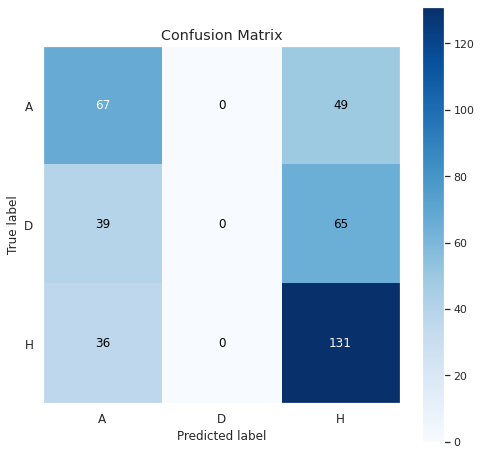

In [67]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    predictions,
    figsize=(8,8))

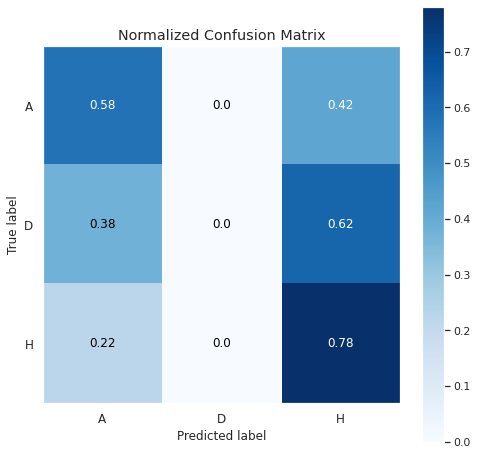

In [68]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    predictions,
    normalize=True,
    figsize=(8,8))

As it can be observed from the confusion matrix and the classification report, the number of accurate predictions of H and A improved when using the SVC model in comparison with the Decision Tree model; 58% of A and 78% of H results were correctly predicted. However, no "D" predictions were produced by the model. 

Overall, both prediction models were found to work better when predicting victories for the host teams. Also, both of them struggled with predicting draws between the teams. The prediction models could be improved either by further modifying the dataset to provide more insightful information to the models, or by adjusting their parameters and attributes to manage their classification processes.